In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

train_features = pd.read_csv('./data/derived/feature_selection/training_data.csv')
test_features = pd.read_csv('./data/derived/feature_selection/test_data.csv')


In [8]:
#DEFINE RECENCY
recency_threshold = 24 * 30.44

features = [
    'genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'pol_lrtt', 'pol_maf12c', 'pol_maf3c',
    'gag_lrtt', 'gp120_lrtt', 'gag_maf3c', 'gp41_maf3c', 'genome_ambig', 'gag_ambig',
    'pol_ambig', 'gp41_ambig', 'gp120_ambig'
]

# Label the data
train_features['recency'] = np.where(train_features['TSI_days'] <= recency_threshold, 1, 0)
test_features['recency'] = np.where(test_features['TSI_days'] <= recency_threshold, 1, 0)

In [9]:
# Features and target variable for training and testing sets
X_train = train_features[features]
y_train = train_features['recency']
X_test = test_features[features]
y_test = test_features['recency']

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[34 15]
 [10 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        49
           1       0.86      0.91      0.88       106

    accuracy                           0.84       155
   macro avg       0.82      0.80      0.81       155
weighted avg       0.84      0.84      0.84       155



<Figure size 800x600 with 0 Axes>

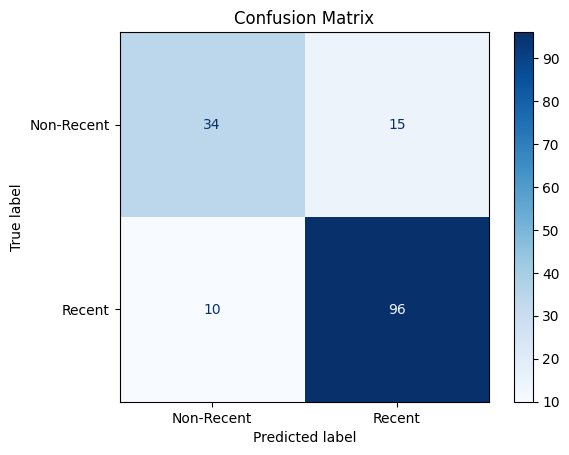

In [10]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Non-Recent', 'Recent']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()